The data consists of:

**For each episode**
- Interactions
  - times the characters speak within the same scene
- Mentions
  - times the characters are mentioned within the same scene
- All
  - same as interactions but added with r2d2 and chewbacca

**Full**
- All data from 6 episodes

Key value pairs:
interactions dict_keys(['nodes', 'links'])
mentions dict_keys(['nodes', 'links'])
all_interactions dict_keys(['nodes', 'links'])

Network Statistics:
Number of nodes: 37
Number of edges: 129
Network density: 0.194
Average clustering coefficient: 0.705

Network Statistics:
Number of nodes: 38
Number of edges: 244
Network density: 0.347
Average clustering coefficient: 0.737

Interactions Network Centrality Analysis:

Top 5 characters by Degree Centrality:
QUI-GON: 0.694
ANAKIN: 0.611
JAR JAR: 0.500
PADME: 0.472
OBI-WAN: 0.361

Top 5 characters by Betweenness Centrality:
QUI-GON: 0.319
ANAKIN: 0.167
JAR JAR: 0.152
NUTE GUNRAY: 0.128
EMPEROR: 0.103

Top 5 characters by Eigenvector Centrality:
QUI-GON: 0.394
ANAKIN: 0.350
PADME: 0.313
JAR JAR: 0.310
OBI-WAN: 0.259

Mentions Network Centrality Analysis:

Top 5 characters by Degree Centrality:
QUI-GON: 0.811
JAR JAR: 0.784
ANAKIN: 0.784
PADME: 0.757
OBI-WAN: 0.676

Top 5 characters by Betweenness Centrality:
JAR JAR: 0.127
QU

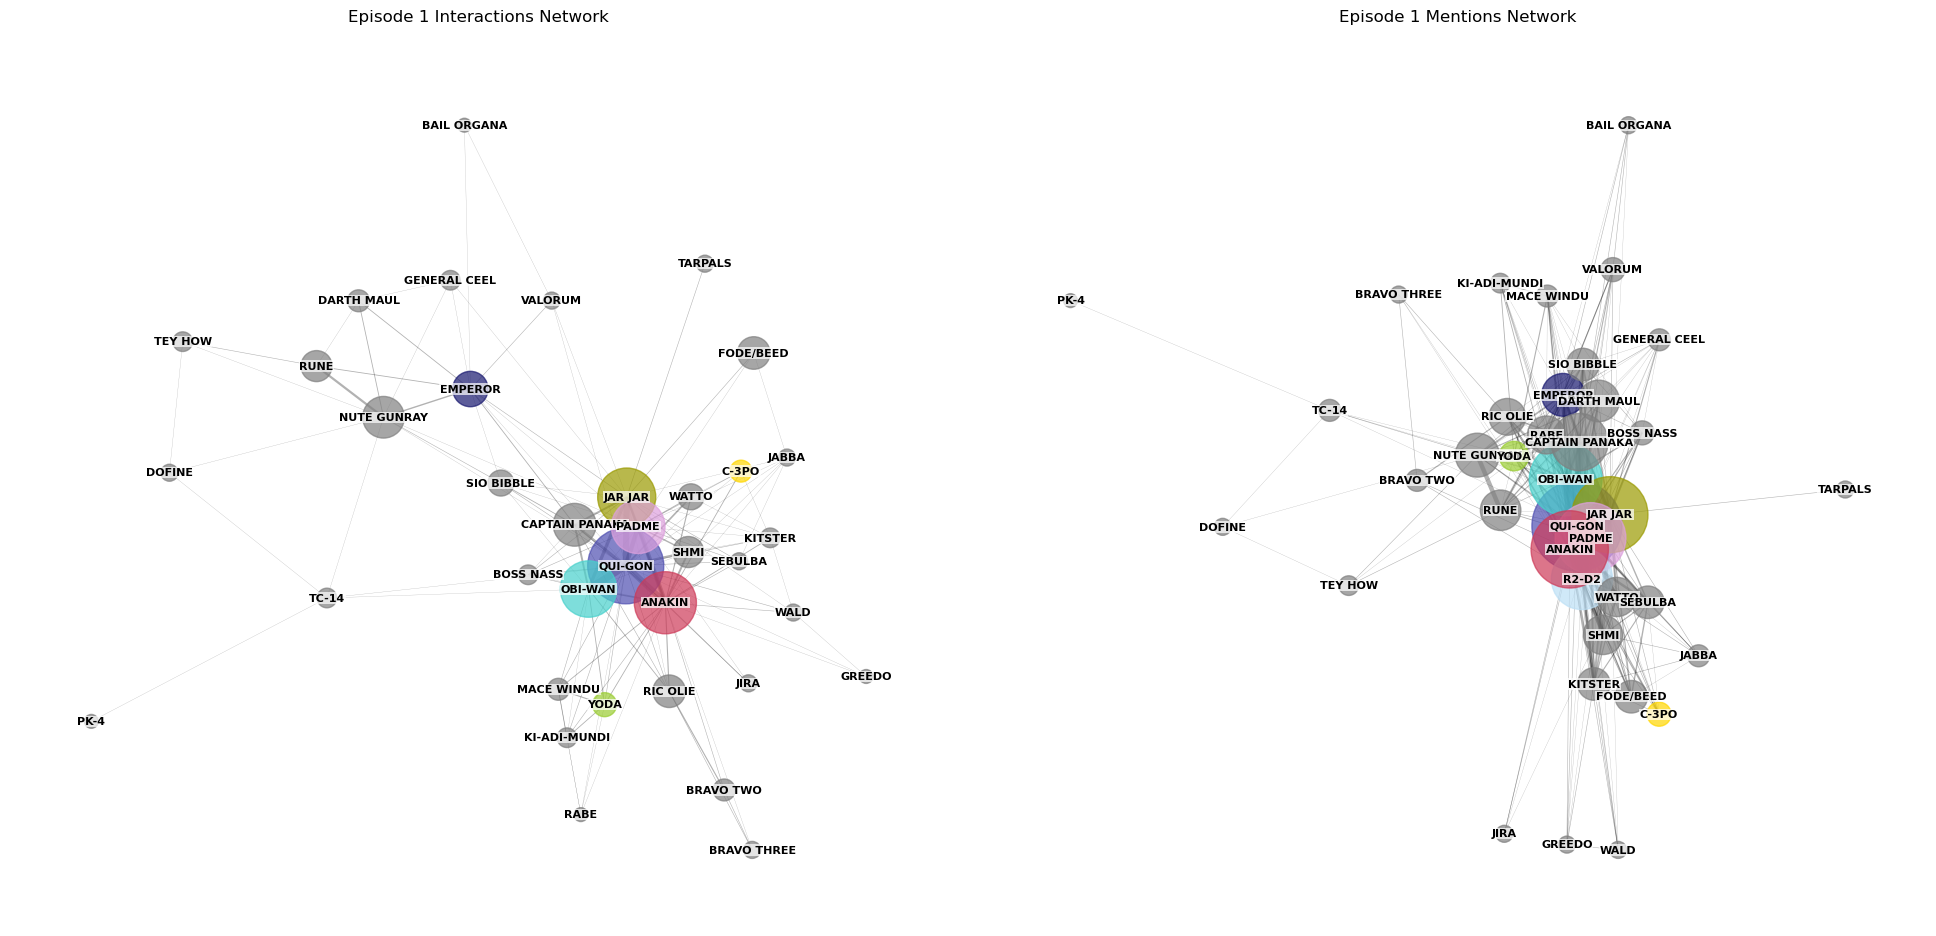

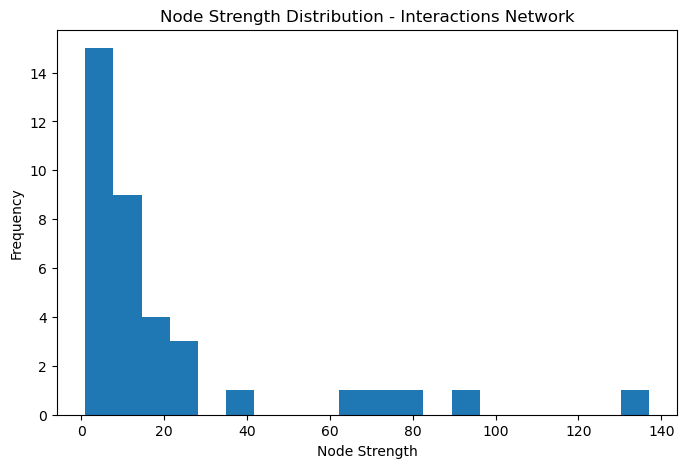

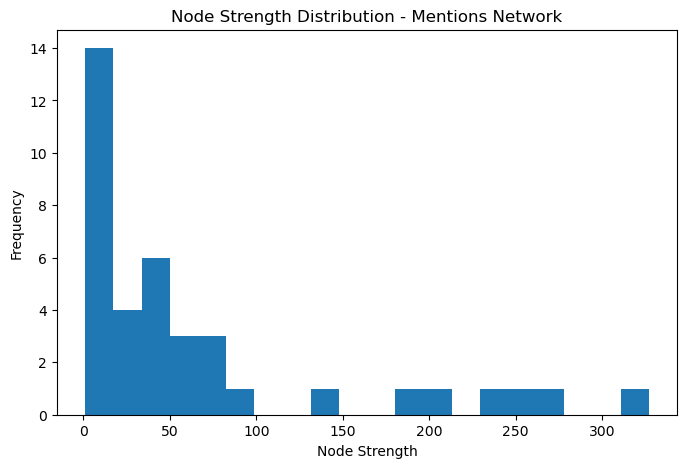

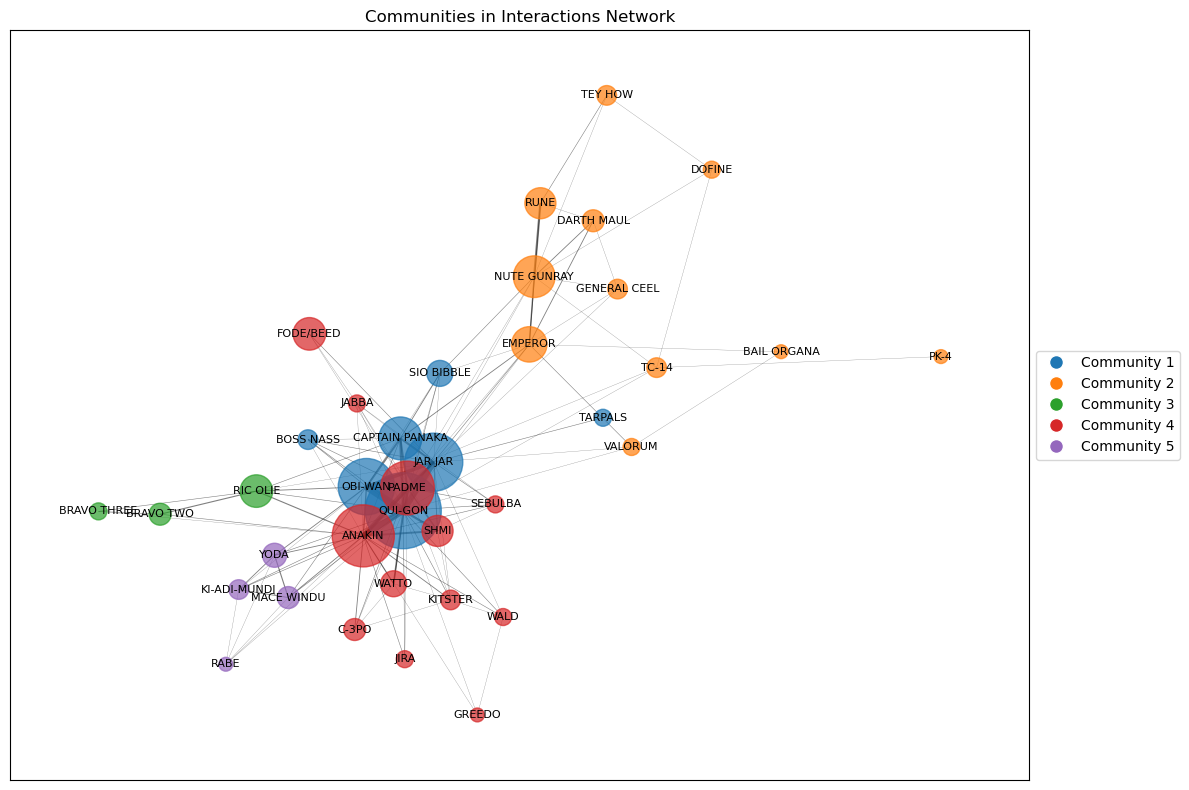

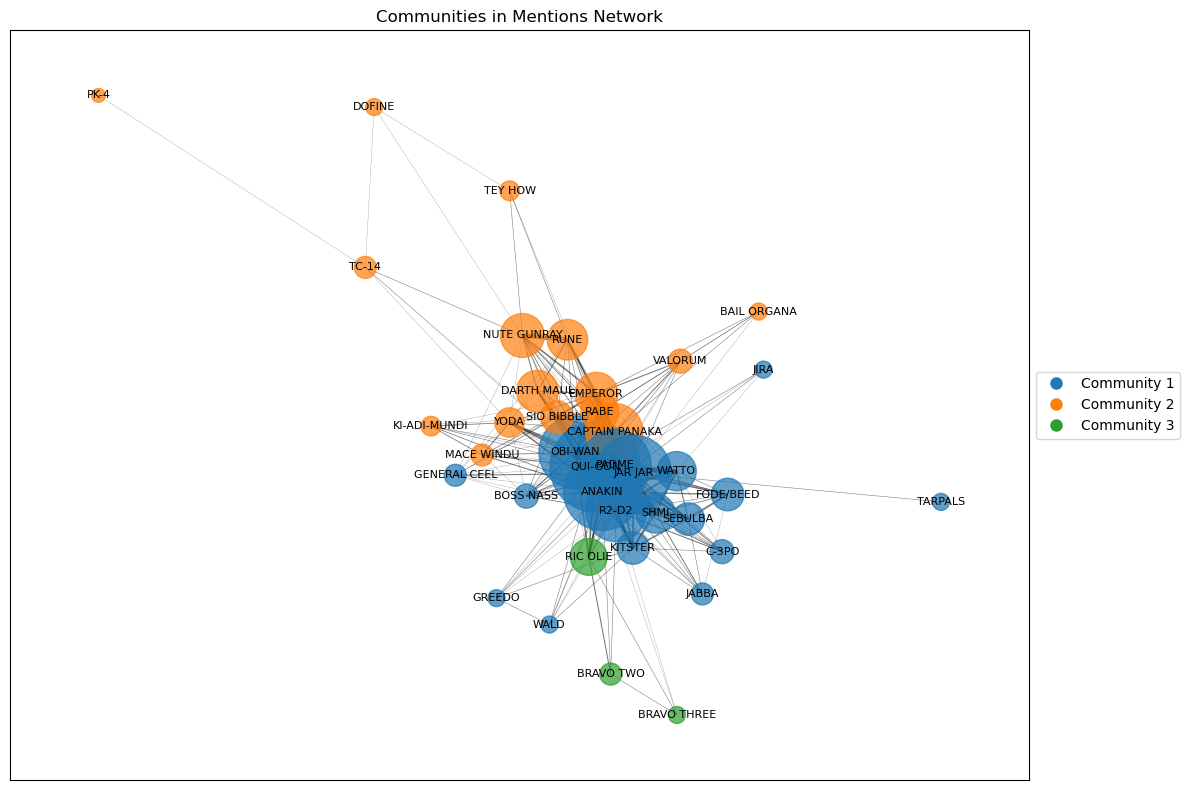

In [27]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import json
import networkx as nx
import nxviz as nv
from nxviz import annotate
from nxviz import nodes
from nxviz import edges
from nxviz.plots import aspect_equal, despine

import matplotlib.pyplot as plt

from pyvis.network import Network

import importlib
import utils

importlib.reload(utils)

interactions: dict = utils.load_json("data/starwars-episode-1-interactions.json")
mentions: dict = utils.load_json("data/starwars-episode-1-mentions.json")
all_interactions: dict = utils.load_json(
    "data/starwars-episode-1-interactions-allCharacters.json"
)

print("Key value pairs:")
print("interactions", interactions.keys())
print("mentions", mentions.keys())
print("all_interactions", all_interactions.keys())

# Load the data
interactions = utils.load_json("data/starwars-episode-1-interactions.json")
mentions = utils.load_json("data/starwars-episode-1-mentions.json")
all_interactions = utils.load_json(
    "data/starwars-episode-1-interactions-allCharacters.json"
)

G_interactions = nx.Graph()
G_mentions = nx.Graph()


def get_graph_with_nodes_and_edges(G: nx.Graph, data: dict):
    for node in data["nodes"]:
        G.add_node(node["name"], value=node["value"], colour=node["colour"])

    for link in data["links"]:
        source = data["nodes"][link["source"]]["name"]
        target = data["nodes"][link["target"]]["name"]
        G.add_edge(source, target, weight=link["value"])

    return G


G_interactions = get_graph_with_nodes_and_edges(G_interactions, interactions)
G_mentions = get_graph_with_nodes_and_edges(G_mentions, mentions)


def get_network_statistics(G: nx.Graph):
    print("\nNetwork Statistics:")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Network density: {nx.density(G):.3f}")
    print(f"Average clustering coefficient: {nx.average_clustering(G):.3f}")


get_network_statistics(G_interactions)
get_network_statistics(G_mentions)


def get_actor_centralities(G: nx.Graph, network_name: str):
    print(f"\n{network_name} Centrality Analysis:")
    
    degree_cent = nx.degree_centrality(G)
    print("\nTop 5 characters by Degree Centrality:")
    for char, cent in sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{char}: {cent:.3f}")

    between_cent = nx.betweenness_centrality(G)
    print("\nTop 5 characters by Betweenness Centrality:")
    for char, cent in sorted(between_cent.items(), key=lambda x: x[1], reverse=True)[
        :5
    ]:
        print(f"{char}: {cent:.3f}")

    eigen_cent = nx.eigenvector_centrality(G)
    print("\nTop 5 characters by Eigenvector Centrality:")
    for char, cent in sorted(eigen_cent.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{char}: {cent:.3f}")


get_actor_centralities(G_interactions, "Interactions Network")
get_actor_centralities(G_mentions, "Mentions Network")


def detect_communities(G: nx.Graph, network_name: str):
    try:
        communities = nx.community.louvain_communities(G, seed=42)
        print(f"\n{network_name} Communities:")
        for i, community in enumerate(communities, 1):
            if community:
                print(f"\nCommunity {i}:")
                print(", ".join(sorted(community)))
        return communities
    except Exception as e:
        print(f"Error detecting communities for {network_name}: {str(e)}")
        return []


try:
    communities_interactions = detect_communities(
        G_interactions, "Interactions Network"
    )
    communities_mentions = detect_communities(G_mentions, "Mentions Network")
except Exception as e:
    print(f"Error in community detection: {str(e)}")

import plots

plots.plot_networks(G_interactions, G_mentions)
plots.plot_strength_distribution(G_interactions, "Interactions Network")
plots.plot_strength_distribution(G_mentions, "Mentions Network")
plots.plot_communities(G_interactions, communities_interactions, "Interactions Network")
plots.plot_communities(G_mentions, communities_mentions, "Mentions Network")